# Exemplos de aulas

### Inferência Estatística

A quantidade de tempo, em minutos, que um passageiro gasta esperando na fila de checkin de um aeroporto é uma variável aleatória com média e variância desconhecidos e distribuição normal.

Supona que uma amostra aleatória de 10 passageiros foi observada, em que os tempos foram: t = [10, 9, 11, 8.5, 7.1, 9, 9.5, 8, 10, 7.8]

1. Encontre a estimativa da média e variância.

2. Essas estimativas são não viciadas?

In [23]:
import  numpy as np

class PointEstimation:
  def __init__(self, X: list) -> None:
    self.X = X
    self.N = len(X)

  def uniformMu(self, a: float, b: float) -> float:
    if (b > a): return (b - a) / 2
    else: return (a - b) / 2

  def uniformVariance(self, a: float, b: float) -> float:
    return ((b - a) ** 2) / 12

  def binomialP(self) -> float:
    return np.sum(self.X) / self.N

  def poissonMu(self) -> float:
    return np.sum(self.X) / self.N

  def exponentialLambda(self) -> float:
    return 1 / (np.sum(self.X) / self.N)

  def normalMu(self) -> float:
    return np.sum(self.X) / self.N

  def normalVariance(self) -> float:
    mu = self.normalMu()
    sumSqr = np.sum([(x - mu)**2 for x in self.X])
    return (1 / (self.N - 1)) * sumSqr

In [24]:
t = [10, 9, 11, 8.5, 7.1, 9, 9.5, 8, 10, 7.8]
PE = PointEstimation(t)

mu = PE.normalMu()
var = PE.normalVariance()

print(mu)
print(var)

8.989999999999998
1.3943333333333332


#### Distribuições amostrais e Teorema Central Do Limite

In [88]:
import numpy as np

class SampleDistribution:
  def __init__(self, N: int, mu: float, sigmaSqr: float) -> None:
    self.N = N
    self.mu = mu
    self.sigmaSqr = sigmaSqr

  def CLTsampleZ(self, x: float) -> float:
    meanShift = x - (self.mu * self.N)
    varShift = self.N * self.sigmaSqr
    normalFactor = 1/(np.sqrt(2 * varShift * np.pi))
    expFactor = np.exp(-(1/2) * ((meanShift ** 2) / varShift))
    return normalFactor * expFactor

In [89]:
SD = SampleDistribution(N=48, mu=0, sigmaSqr=1/12)
SD.CLTsampleZ(0)

0.19947114020071635

Após arredondamento par ao inteiro mais próximo, 48 números são somados. Os erros de arredondamento individuais são uniformemente distribuídos no intervalo (-0.5, 0.5). 

Qual a probabilidade de que a soma dos números arredondados seja diferente da verdadeira soma por mais de 3 unidades (em ambos os sentidos)?

0.5 0.08333333333333333


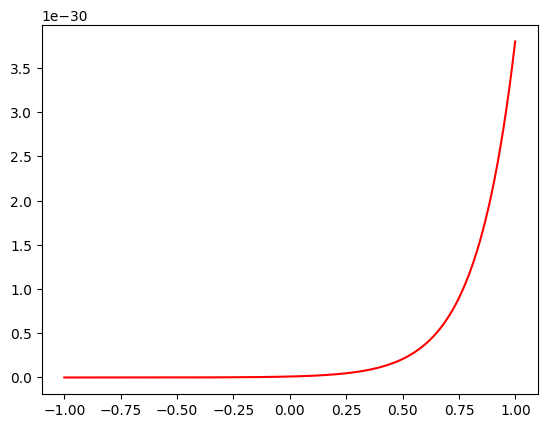

1.0000000000000002


In [91]:
X = [-0.5, 0.5]
PE = PointEstimation(X)
mu = PE.uniformMu(X[0], X[1])
var = PE.uniformVariance(X[0], X[1])
print(mu, var)

from scipy import integrate

SD = SampleDistribution(N=48, mu=mu, sigmaSqr=var)

import matplotlib.pyplot as plt

t = np.arange(-1, 1, 0.001)
plt.plot(t, [SD.CLTsampleZ(i) for i in t], 'r-')
plt.show()

Z = integrate.quad(SD.CLTsampleZ, -np.inf, -3)[0] + integrate.quad(SD.CLTsampleZ, 3, np.inf)[0]
print(Z)



